In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('BigMart_Sales.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# Numerical columns replaced with Mean
# Categorical columns replaced with Mode

df['Item_Weight'].mean()

12.857645184135976

In [6]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df.isnull().sum()

/var/folders/f9/b1rf60v156n1r74gm8zx6f3c0000gn/T/ipykernel_25296/3947621628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## How to fill missing values for object columns:

In [7]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [8]:
missing_values = df['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [9]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 1000x600 with 0 Axes>

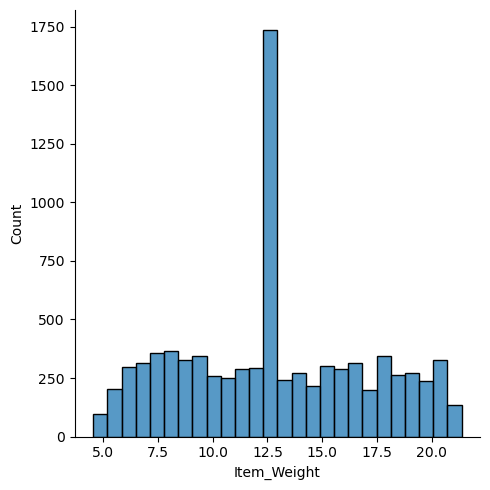

In [11]:
# Data Distribution for Item_Weight
plt.figure(figsize=(10,6))
sns.displot(df['Item_Weight'])
plt.show()

<Figure size 1000x600 with 0 Axes>

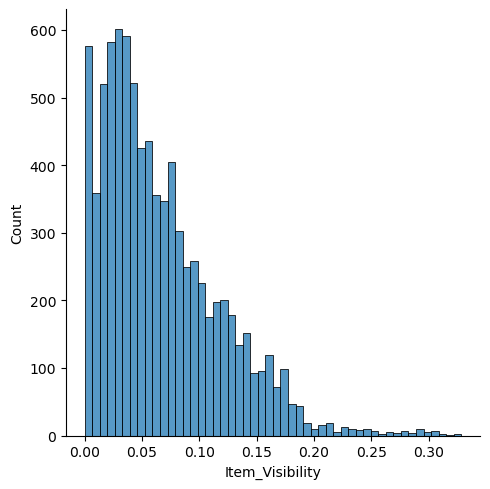

In [12]:
# Data Distribution for Item_Visibility
plt.figure(figsize=(10,6))
sns.displot(df['Item_Visibility'])
plt.show()

<Figure size 1000x600 with 0 Axes>

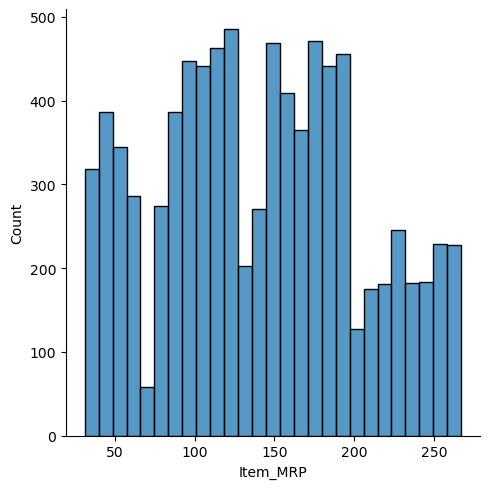

In [13]:
# Data Distribution for Item_MRP
plt.figure(figsize=(10,6))
sns.displot(df['Item_MRP'])
plt.show()

<Figure size 1000x600 with 0 Axes>

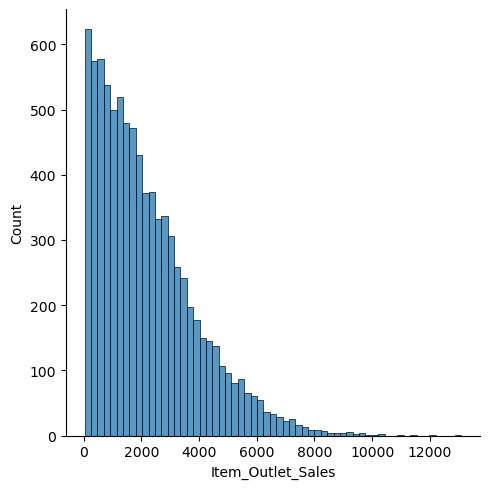

In [14]:
# Data Distribution for Item_Outlet_Sales
plt.figure(figsize=(10,6))
sns.displot(df['Item_Outlet_Sales'])
plt.show()

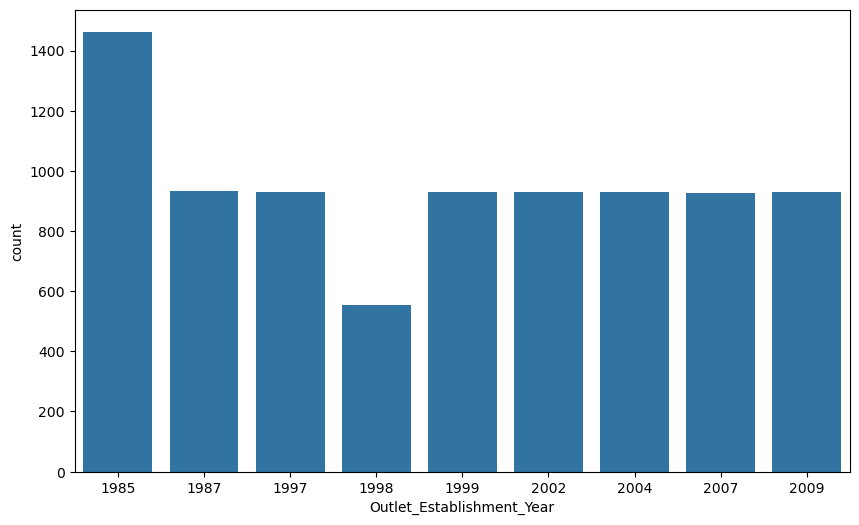

In [15]:
# Count plot for Outlet_Establishment_Year
plt.figure(figsize=(10,6))
sns.countplot(x = df['Outlet_Establishment_Year'], data=df)
plt.show()

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


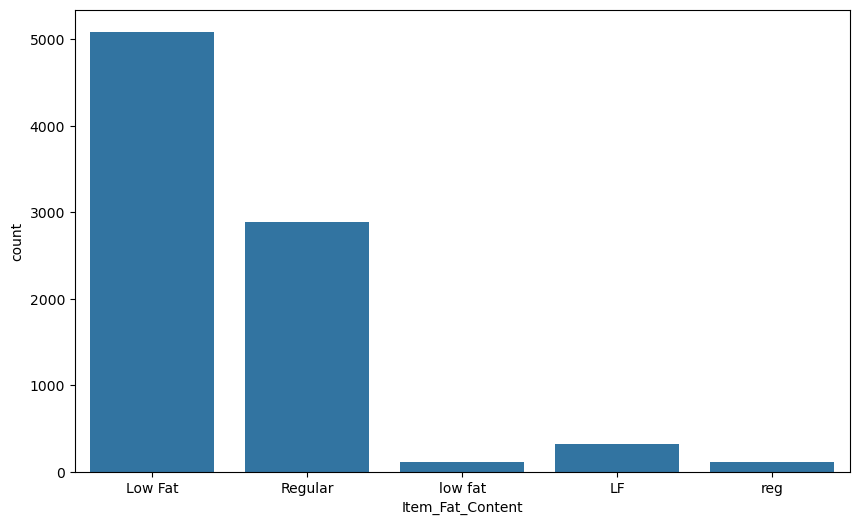

In [17]:
# Count plot for Item_Fat_Content
plt.figure(figsize=(10,6))
sns.countplot(x = df['Item_Fat_Content'], data=df)
plt.show()

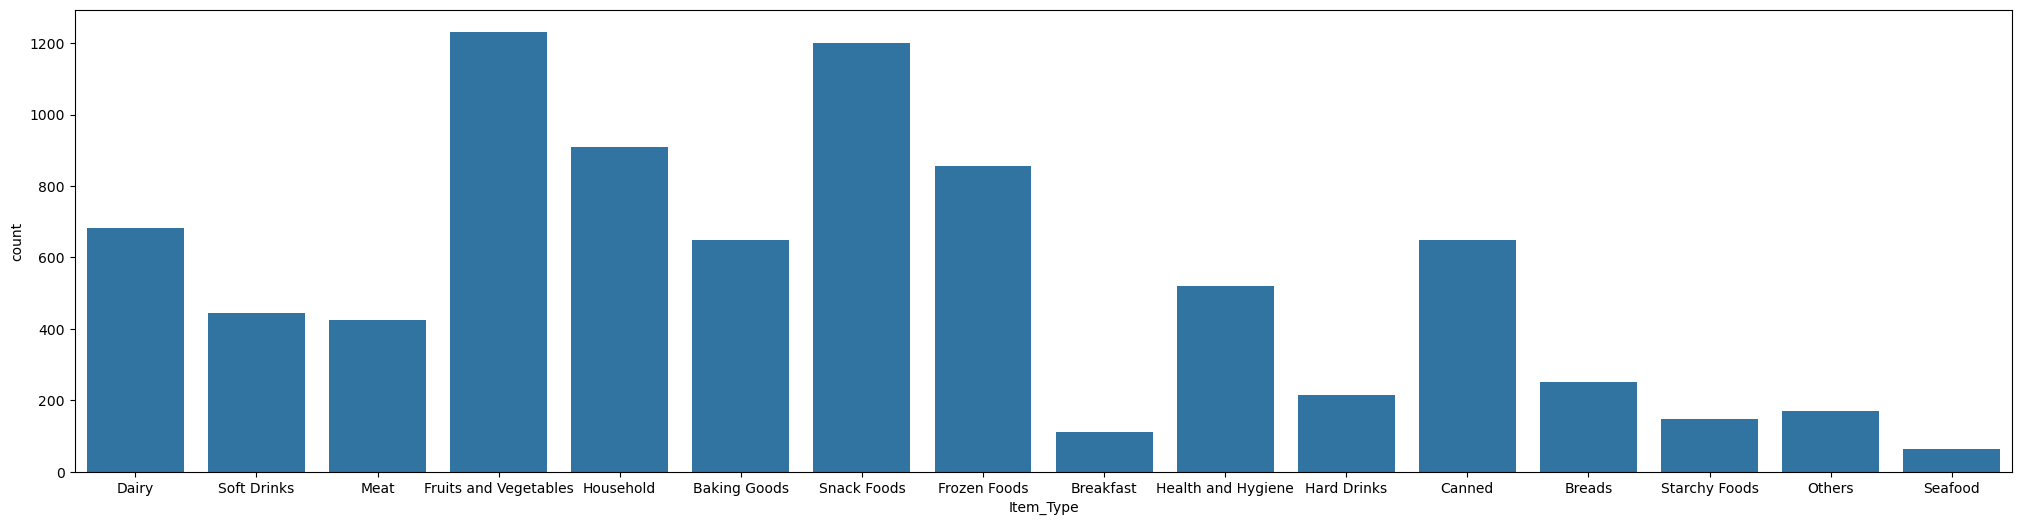

In [18]:
# Count plot for Item_Type
plt.figure(figsize=(25,6))
sns.countplot(x = df['Item_Type'], data=df)
plt.show()

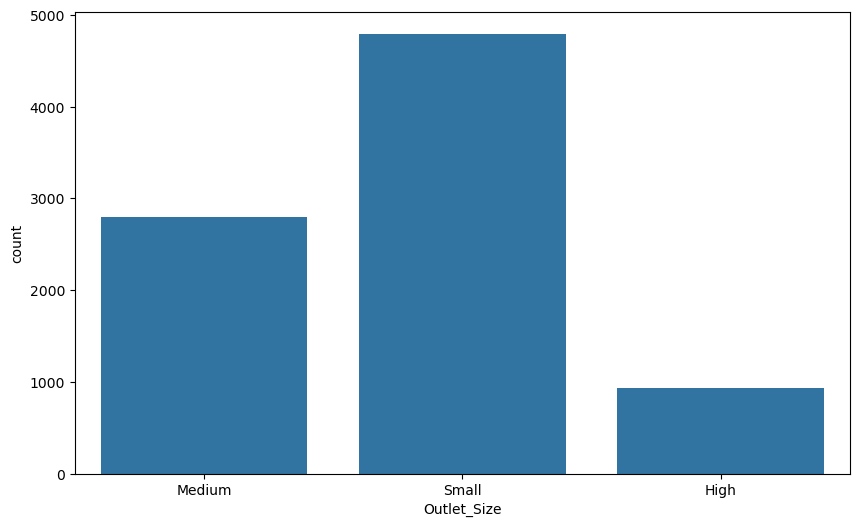

In [19]:
# Count plot for Outlet_Size
plt.figure(figsize=(10,6))
sns.countplot(x = df['Outlet_Size'], data=df)
plt.show()

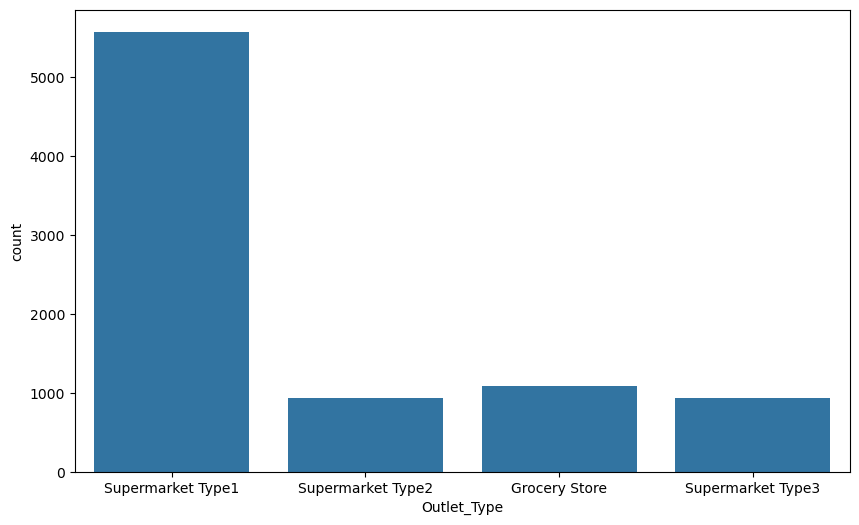

In [20]:
# Count plot for Outlet_Type
plt.figure(figsize=(10,6))
sns.countplot(x = df['Outlet_Type'], data=df)
plt.show()

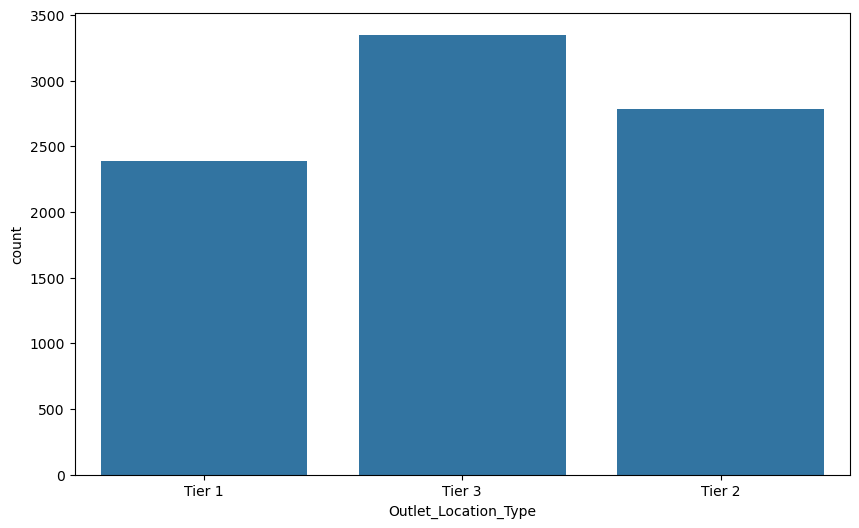

In [21]:
# Count plot for Outlet_Location_Type
plt.figure(figsize=(10,6))
sns.countplot(x = df['Outlet_Location_Type'], data=df)
plt.show()

In [22]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [23]:
df.replace({'Item_Fat_Content': {
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}}, inplace=True)

In [24]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [25]:
df.sample(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1218,DRG01,14.800000,Low Fat,0.044841,Soft Drinks,78.3670,OUT013,1987,High,Tier 3,Supermarket Type1,918.8040
3289,DRD49,9.895000,Low Fat,0.167831,Soft Drinks,237.4564,OUT046,1997,Small,Tier 1,Supermarket Type1,715.0692
6485,NCX05,15.200000,Low Fat,0.097044,Health and Hygiene,116.8492,OUT035,2004,Small,Tier 2,Supermarket Type1,2664.5316
1986,DRG37,16.200000,Low Fat,0.019418,Soft Drinks,153.7972,OUT045,2002,Small,Tier 2,Supermarket Type1,1402.1748
2058,FDE41,9.195000,Regular,0.064002,Frozen Foods,85.5566,OUT035,2004,Small,Tier 2,Supermarket Type1,930.1226
2689,NCX06,17.600000,Low Fat,0.015687,Household,182.6976,OUT046,1997,Small,Tier 1,Supermarket Type1,3440.8544
1191,DRD15,10.600000,Low Fat,0.056911,Dairy,233.9642,OUT045,2002,Small,Tier 2,Supermarket Type1,3717.8272
7675,FDU12,15.500000,Regular,0.076060,Baking Goods,265.1568,OUT018,2009,Medium,Tier 3,Supermarket Type2,2109.2544
290,DRF49,7.270000,Low Fat,0.071222,Soft Drinks,113.5518,OUT045,2002,Small,Tier 2,Supermarket Type1,569.2590
1510,FDL57,15.100000,Regular,0.067350,Snack Foods,257.3304,OUT018,2009,Medium,Tier 3,Supermarket Type2,3874.9560


In [26]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [27]:
df['Item_Identifier'] = encode.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encode.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encode.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encode.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encode.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encode.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encode.fit_transform(df['Outlet_Type'])

In [28]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

In [29]:
df['Item_Type'].value_counts()

Item_Type
6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: count, dtype: int64

In [30]:
x = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

In [31]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [32]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(8523, 11) (6818, 11) (1705, 11)
(8523,) (6818,) (1705,)


In [35]:
# Model Creation
from xgboost import XGBRegressor

In [36]:
model = XGBRegressor()

In [37]:
# Training the model
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
from sklearn.metrics import r2_score

In [39]:
pred_train = model.predict(x_train)

In [40]:
r2_score(y_train, pred_train)

0.8767038065269914

In [41]:
pred_test = model.predict(x_test)
r2_score(y_test, pred_test)

0.524872071316624

In [43]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

In [44]:
pred_train = model.predict(x_train)
r2_score(y_train, pred_train)


0.9380110277018903

In [45]:
pred_test = model.predict(x_test)
r2_score(y_test, pred_test)

0.5522556198513955